In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df18 = pd.read_pickle("../preprocessed_data/2018_all_data.pkl")

In [15]:
sample = df18.sample(n = 1000, random_state = 1)

In [16]:
sample['approx_dist'] = sample['approx_dist'].replace(0,0.5)

Text(0.5, 1.0, 'Trip Cost Distribution')

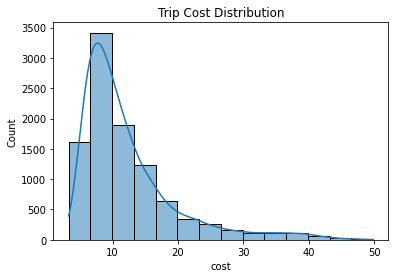

In [4]:
hist = sns.histplot(data = sample, x = 'cost', kde = True, bins = int(np.log2(len(sample))) + 1)
plt.title('Trip Cost Distribution')
#plt.savefig('../plots/cost_hist_10000_sturges.png')

Text(0.5, 1.0, 'Trip cost vs approximate distance')

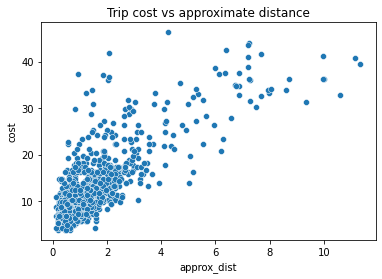

In [17]:
sns.scatterplot(data = sample, x = 'approx_dist', y = 'cost')
plt.title('Trip cost vs approximate distance')
#plt.savefig('../plots/approx_vs_cost.png')

Text(0.5, 1.0, 'Distance Approximation Error')

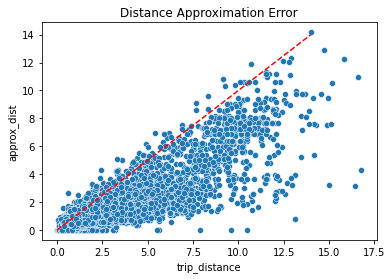

In [6]:
sns.scatterplot(data = sample, x = 'trip_distance', y = 'approx_dist')
plt.plot([0,14], [0,14], 'r--')
plt.title('Distance Approximation Error')
#plt.savefig('../plots/approx_vs_actual_dist.png')

In [18]:
sample['cost'] = np.log(sample['cost'])
sample['approx_dist'] = np.log(sample['approx_dist'])

In [19]:
sample.columns

Index(['pickup_time', 'dropoff_time', 'passenger_count', 'trip_distance',
       'PULocationID', 'DOLocationID', 'total_amount', 'month', 'dow', 'cost',
       'date', 'PU_crashes', 'DO_crashes', 'PUcentre', 'DOcentre',
       'approx_dist', 'DailyAverageDryBulbTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageWindSpeed',
       'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'year', 'hour',
       'price_bracket', 'PUBorough', 'DOBorough', 'PU_rides_in_zone',
       'DO_rides_in_zone'],
      dtype='object')

In [20]:
pairplot_x = ['cost', 'approx_dist', 'PU_crashes', 'DO_crashes', 'PU_rides_in_zone', \
              'DO_rides_in_zone', 'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity', \
              'DailyAverageWindSpeed', 'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall']

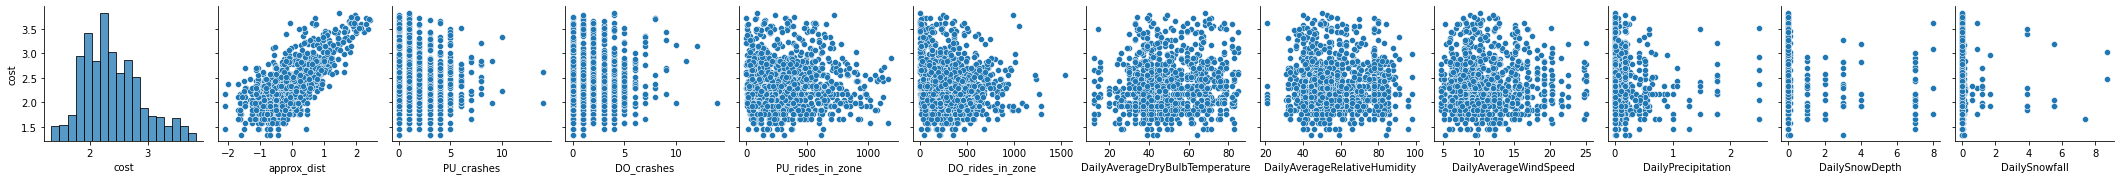

In [21]:
sns.pairplot(sample, y_vars = ['cost'], x_vars = pairplot_x)

In [ ]:
#Geospatial

In [22]:
geo_sample = df18.groupby('PULocationID').sample(n = 10, replace = True)

In [23]:
sf = gpd.read_file('../preprocessed_data/zones/fixed_taxi_zones.shp')

In [28]:
gdf = gpd.GeoDataFrame(pd.merge(geo_sample, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)

In [29]:
geoJSON = gdf[['LocationID','geometry']].drop_duplicates('LocationID').to_json()

In [30]:
means = gdf.groupby('LocationID').mean().reset_index()

In [33]:
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

m.add_child(folium.Choropleth(
    geo_data=geoJSON,
    data = means,
    columns = ["LocationID", "cost"],
    key_on="properties.LocationID",
    fill_color="YlOrBr",
    fill_opacity=0.7,
    line_opacity=0.2,
    name='choropleth',
    legend_name = "Average Trip Cost ($)"
))

#m.save('../plots/trip_cost.html')

'\nm = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)\n\nm.add_child(folium.Choropleth(\n    geo_data=geoJSON,\n    data = means,\n    columns = ["LocationID", "cost"],\n    key_on="properties.LocationID",\n    fill_color="YlOrBr",\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    name=\'choropleth\',\n    legend_name = "Average Trip Cost ($)"\n))\n\n#m.save(\'plots/trip_cost.html\')'

In [34]:
crashes = pd.read_pickle('../preprocessed_data/crashes_w_zones.pkl')

In [40]:
from folium.plugins import HeatMap
crash_heatmap = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)
crash_heatmap.add_child(HeatMap(crashes[['LATITUDE', 'LONGITUDE']].values, radius=12.5))
#crash_heatmap.save('../plots/crash_heatmap.html')
crash_heatmap

'from folium.plugins import HeatMap\ncrash_heatmap = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)\ncrash_heatmap.add_child(HeatMap(crashes[[\'LATITUDE\', \'LONGITUDE\']].values, radius=12.5))\n#crash_heatmap.save(\'plots/crash_heatmap.html\')\ncrash_heatmap'